Implementation of a n-armed bandit in tensorflow agents

In [223]:
from tf_agents.environments import py_environment, tf_py_environment
from tf_agents.specs import BoundedArraySpec, ArraySpec
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [224]:
class Env(py_environment.PyEnvironment):

    def __init__(self, means: list, stds: list) -> None:
        
        assert len(means) == len(stds), "Length of means and length of stds must be the same"
        assert all([i >= 0 for i in stds]), "All stds must be >= 0"

        self.n_arms = len(means)
        self.means = means
        self.stds = stds

        self._action_spec = BoundedArraySpec(shape=(self.n_arms,), dtype=np.int32, minimum=0, maximum=self.n_arms-1)
        self._observation_spec = ArraySpec(shape=(self.n_arms,), dtype=np.float64)
        self._state = np.zeros(self.n_arms)
        self._current_time_step = 0
        self.action_space = list(range(self.n_arms))
        
        # self.replay_spec = {0:[0], 1:[0], 2:[0]}
        self.replay_spec = {i:[0] for i in range(len(means))}

    def action_spec(self):
        return self._action_spec

    def observation_spec(self):
        return self._observation_spec

    def _reset(self):
        pass

    def _step(self, action):
        return np.random.normal(self.means[action], self.stds[action])

In [165]:
env = Env(np.random.randint(7, 20, 5), np.random.rand(5))

In [ ]:
N_ROUNDS = 1000
EPS = 0.9
rewards = env.replay_spec# {0:[0], 1:[0], 2:[0]}
action_hist = []
action_rewards = {"action":[], "reward":[]}
eps_end = 0.05
eps_decay = (EPS-eps_end)/N_ROUNDS

for _ in range(N_ROUNDS):
    EPS -= eps_decay
    print(EPS)
    if np.random.rand() < EPS:
        action = np.random.choice(env.action_space)
    else:
        action = sorted([(action, np.mean(rewards[action])) for action in rewards.keys()], key=lambda x:x[1], reverse=True)[0][0]
    
    # print(action)
    action_rewards["action"].append(action)
    reward = env.step(action)
    action_rewards["reward"].append(reward)
    rewards[action].append(reward)
    
    # print(reward)
    # avg_reward[action[0]].append(reward)


In [181]:
res = pd.DataFrame(action_rewards)
regret = res.reward - max(env.means)

In [182]:
res.action.unique()

array([2, 0, 1, 3, 4], dtype=int64)

Text(0, 0.5, '$r^*-R(a)$')

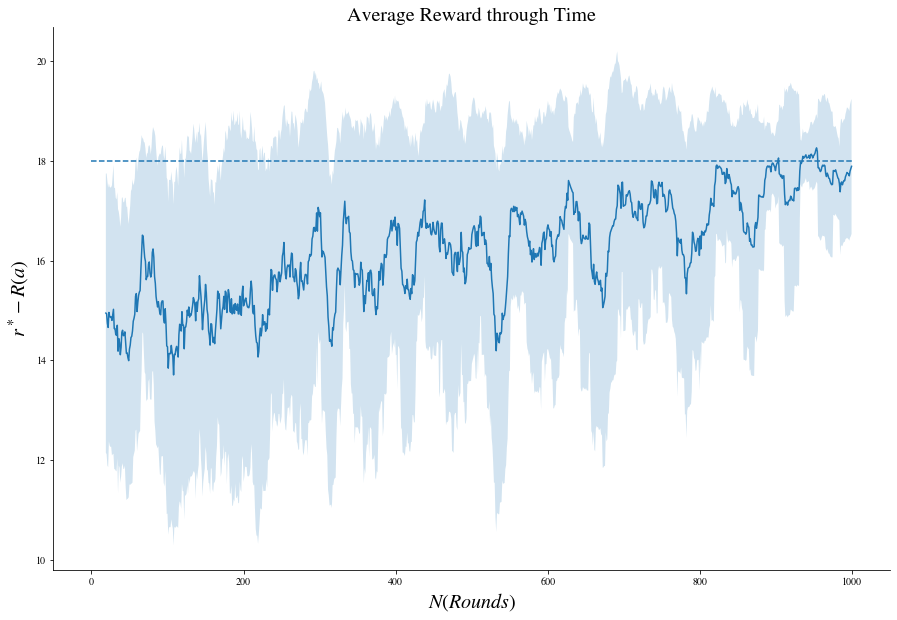

In [225]:
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
fig, ax = plt.subplots(figsize=(15,10))
x = range(N_ROUNDS)
mean = res.reward.rolling(20).mean()
std = res.reward.rolling(20).std()
sns.lineplot(mean, ax=ax)
plt.fill_between(x, mean - std, mean + std, alpha=0.2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.hlines([18], [0], [1000], linestyles="dashed")
ax.set_title('Average Reward through Time', fontsize=20)
ax.set_xlabel('$N(Rounds)$',fontsize=20)
ax.set_ylabel('$r^*-R(a)$', fontsize=20)

In [205]:
x = res.pivot(columns="action", values="reward")
x

action,0,1,2,3,4
0,NaN,NaN,12.531126,NaN,NaN
1,16.246676,NaN,NaN,NaN,NaN
2,NaN,17.136564,NaN,NaN,NaN
3,NaN,NaN,NaN,9.989562,NaN
4,NaN,NaN,NaN,NaN,15.548033
...,...,...,...,...,...
995,NaN,17.859576,NaN,NaN,NaN
996,NaN,17.501439,NaN,NaN,NaN
997,NaN,19.123020,NaN,NaN,NaN
998,NaN,18.803554,NaN,NaN,NaN


In [210]:
x.rolling(axis=0, window=10).mean()

action,0,1,2,3,4
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
995,NaN,18.192061,NaN,NaN,NaN
996,NaN,18.190359,NaN,NaN,NaN
997,NaN,18.324218,NaN,NaN,NaN
998,NaN,18.408251,NaN,NaN,NaN


<AxesSubplot:xlabel='reward', ylabel='Count'>

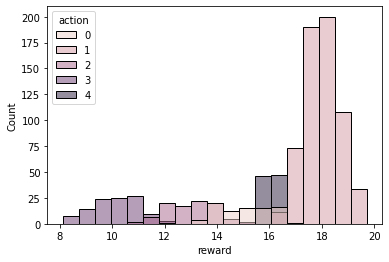

In [198]:
sns.histplot(data=res, x="reward", hue="action")

In [50]:
res

,action,reward
0,0,-9.211582
1,0,-12.746572
2,0,-7.002267
3,0,-10.744806
4,0,-12.787086
...,...,...
9995,0,-12.289472
9996,0,-10.688645
9997,0,-4.367742
9998,0,-8.378978
